In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Carregar o dataset Digits
digits = load_digits()

# Separar as features (X) e os rótulos (y)
X, y = digits.data, digits.target

# Dividir o dataset em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [2]:
from sklearn.tree import DecisionTreeClassifier

# Inicializar o modelo de árvore de decisão
# Aqui estamos definindo a profundidade máxima mas vamos simular outras opções mais a frente
model = DecisionTreeClassifier(max_depth=20, random_state=42)


In [3]:
# Treinar o modelo
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=20, random_state=42)

In [4]:
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Calcular a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy:.2f}')

# um pouco mais de metricas
target_names = [str(i) for i in range(10)]  # MNIST tem classes de 0 a 9
print(classification_report(y_test, y_pred, target_names=target_names))


Acurácia do modelo: 0.84
              precision    recall  f1-score   support

           0       0.97      0.88      0.92        33
           1       0.85      0.79      0.81        28
           2       0.86      0.73      0.79        33
           3       0.76      0.85      0.81        34
           4       0.84      0.91      0.88        46
           5       0.89      0.85      0.87        47
           6       0.97      0.91      0.94        35
           7       0.82      0.91      0.86        34
           8       0.75      0.70      0.72        30
           9       0.75      0.82      0.79        40

    accuracy                           0.84       360
   macro avg       0.84      0.84      0.84       360
weighted avg       0.85      0.84      0.84       360



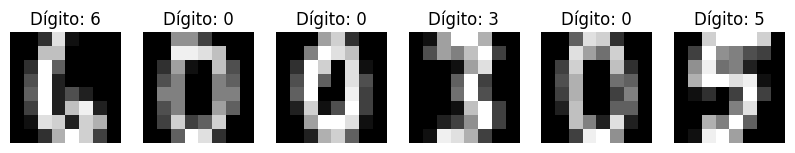

In [5]:
import matplotlib.pyplot as plt

# Mostrar algumas imagens do dataset Digits com suas respectivas labels
def plot_digits_images(images, labels, num_images=6):
    plt.figure(figsize=(10, 4))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i].reshape(8, 8), cmap='gray')
        plt.title(f'Dígito: {labels[i]}')
        plt.axis('off')
    plt.show()

# Exibir algumas imagens de exemplo do conjunto de treinamento
plot_digits_images(X_train, y_train)


In [6]:
# testando mais hiperparametros

from sklearn.metrics import accuracy_score
from sklearn.model_selection import ParameterGrid
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# Definir o grid de hiperparâmetros
param_grid = {
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Criar uma lista para armazenar os resultados
results = []

# Loop sobre cada combinação de parâmetros
for params in ParameterGrid(param_grid):
    # Criar e treinar o modelo com os hiperparâmetros atuais
    model = DecisionTreeClassifier(**params, random_state=42)
    model.fit(X_train, y_train)
    
    # Fazer previsões no conjunto de teste
    y_pred = model.predict(X_test)
    
    # Calcular a acurácia
    accuracy = accuracy_score(y_test, y_pred)
    
    # Armazenar os parâmetros e a acurácia na lista de resultados
    results.append({
        'max_depth': params['max_depth'],
        'min_samples_split': params['min_samples_split'],
        'min_samples_leaf': params['min_samples_leaf'],
        'accuracy': accuracy
    })

# Converter a lista de resultados em um DataFrame para exibição
results_df = pd.DataFrame(results)


In [7]:
# visualizar os resultados
results_df = pd.DataFrame(results)

best_result = results_df.loc[results_df['accuracy'].idxmax()]

# Exibir a tabela de resultados
print("Tabela de Resultados:")
print(results_df)

# Destacar a melhor acurácia e os parâmetros
print("\nMelhor Resultado:")
print(f"Acurácia: {best_result['accuracy']:.4f}")
print(f"Parâmetros: {best_result.drop('accuracy').to_dict()}")



Tabela de Resultados:
    max_depth  min_samples_split  min_samples_leaf  accuracy
0          10                  2                 1  0.850000
1          10                 10                 1  0.833333
2          10                 20                 1  0.844444
3          10                  2                 5  0.847222
4          10                 10                 5  0.847222
5          10                 20                 5  0.841667
6          10                  2                10  0.847222
7          10                 10                10  0.847222
8          10                 20                10  0.847222
9          20                  2                 1  0.841667
10         20                 10                 1  0.825000
11         20                 20                 1  0.838889
12         20                  2                 5  0.844444
13         20                 10                 5  0.844444
14         20                 20                 5  0.841667
15

A máxima acuracia obtida foi 0.8500 para uma decision tree com max_depth de 10, min_samples_split de 2.0 e min_samples_leaf 1.0

Vamos testar agora alguns modelos Ensemble

In [8]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Treinar o modelo AdaBoost
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_ada = ada_model.predict(X_test)

# Avaliar o desempenho do modelo AdaBoost
ada_accuracy = accuracy_score(y_test, y_pred_ada)
print(f"Acurácia do AdaBoost: {ada_accuracy:.4f}")


/home/codespace/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Acurácia do AdaBoost: 0.2194


In [9]:
from xgboost import XGBClassifier  
# XGBoost precisa de int vs string
y_train_int = y_train.astype(int)
y_test_int = y_test.astype(int)

# Treinar o modelo XGBoost
xgb_model = XGBClassifier(n_estimators=100, max_depth=20, use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train_int)

# Fazer previsões no conjunto de teste
y_pred_xgb = xgb_model.predict(X_test)

# Avaliar o desempenho do modelo XGBoost
xgb_accuracy = accuracy_score(y_test_int, y_pred_xgb)
print(f"Acurácia do XGBoost: {xgb_accuracy:.4f}")



/home/codespace/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [01:20:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Acurácia do XGBoost: 0.9694


In [10]:
import pickle

with open('xbg_model.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)

In [11]:
from sklearn.ensemble import RandomForestClassifier

# Treinar o modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42)
rf_model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_rf = rf_model.predict(X_test)

# Avaliar o desempenho do modelo Random Forest
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Acurácia do Random Forest: {rf_accuracy:.4f}")


Acurácia do Random Forest: 0.9722


In [12]:
import pickle

with open('rf_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

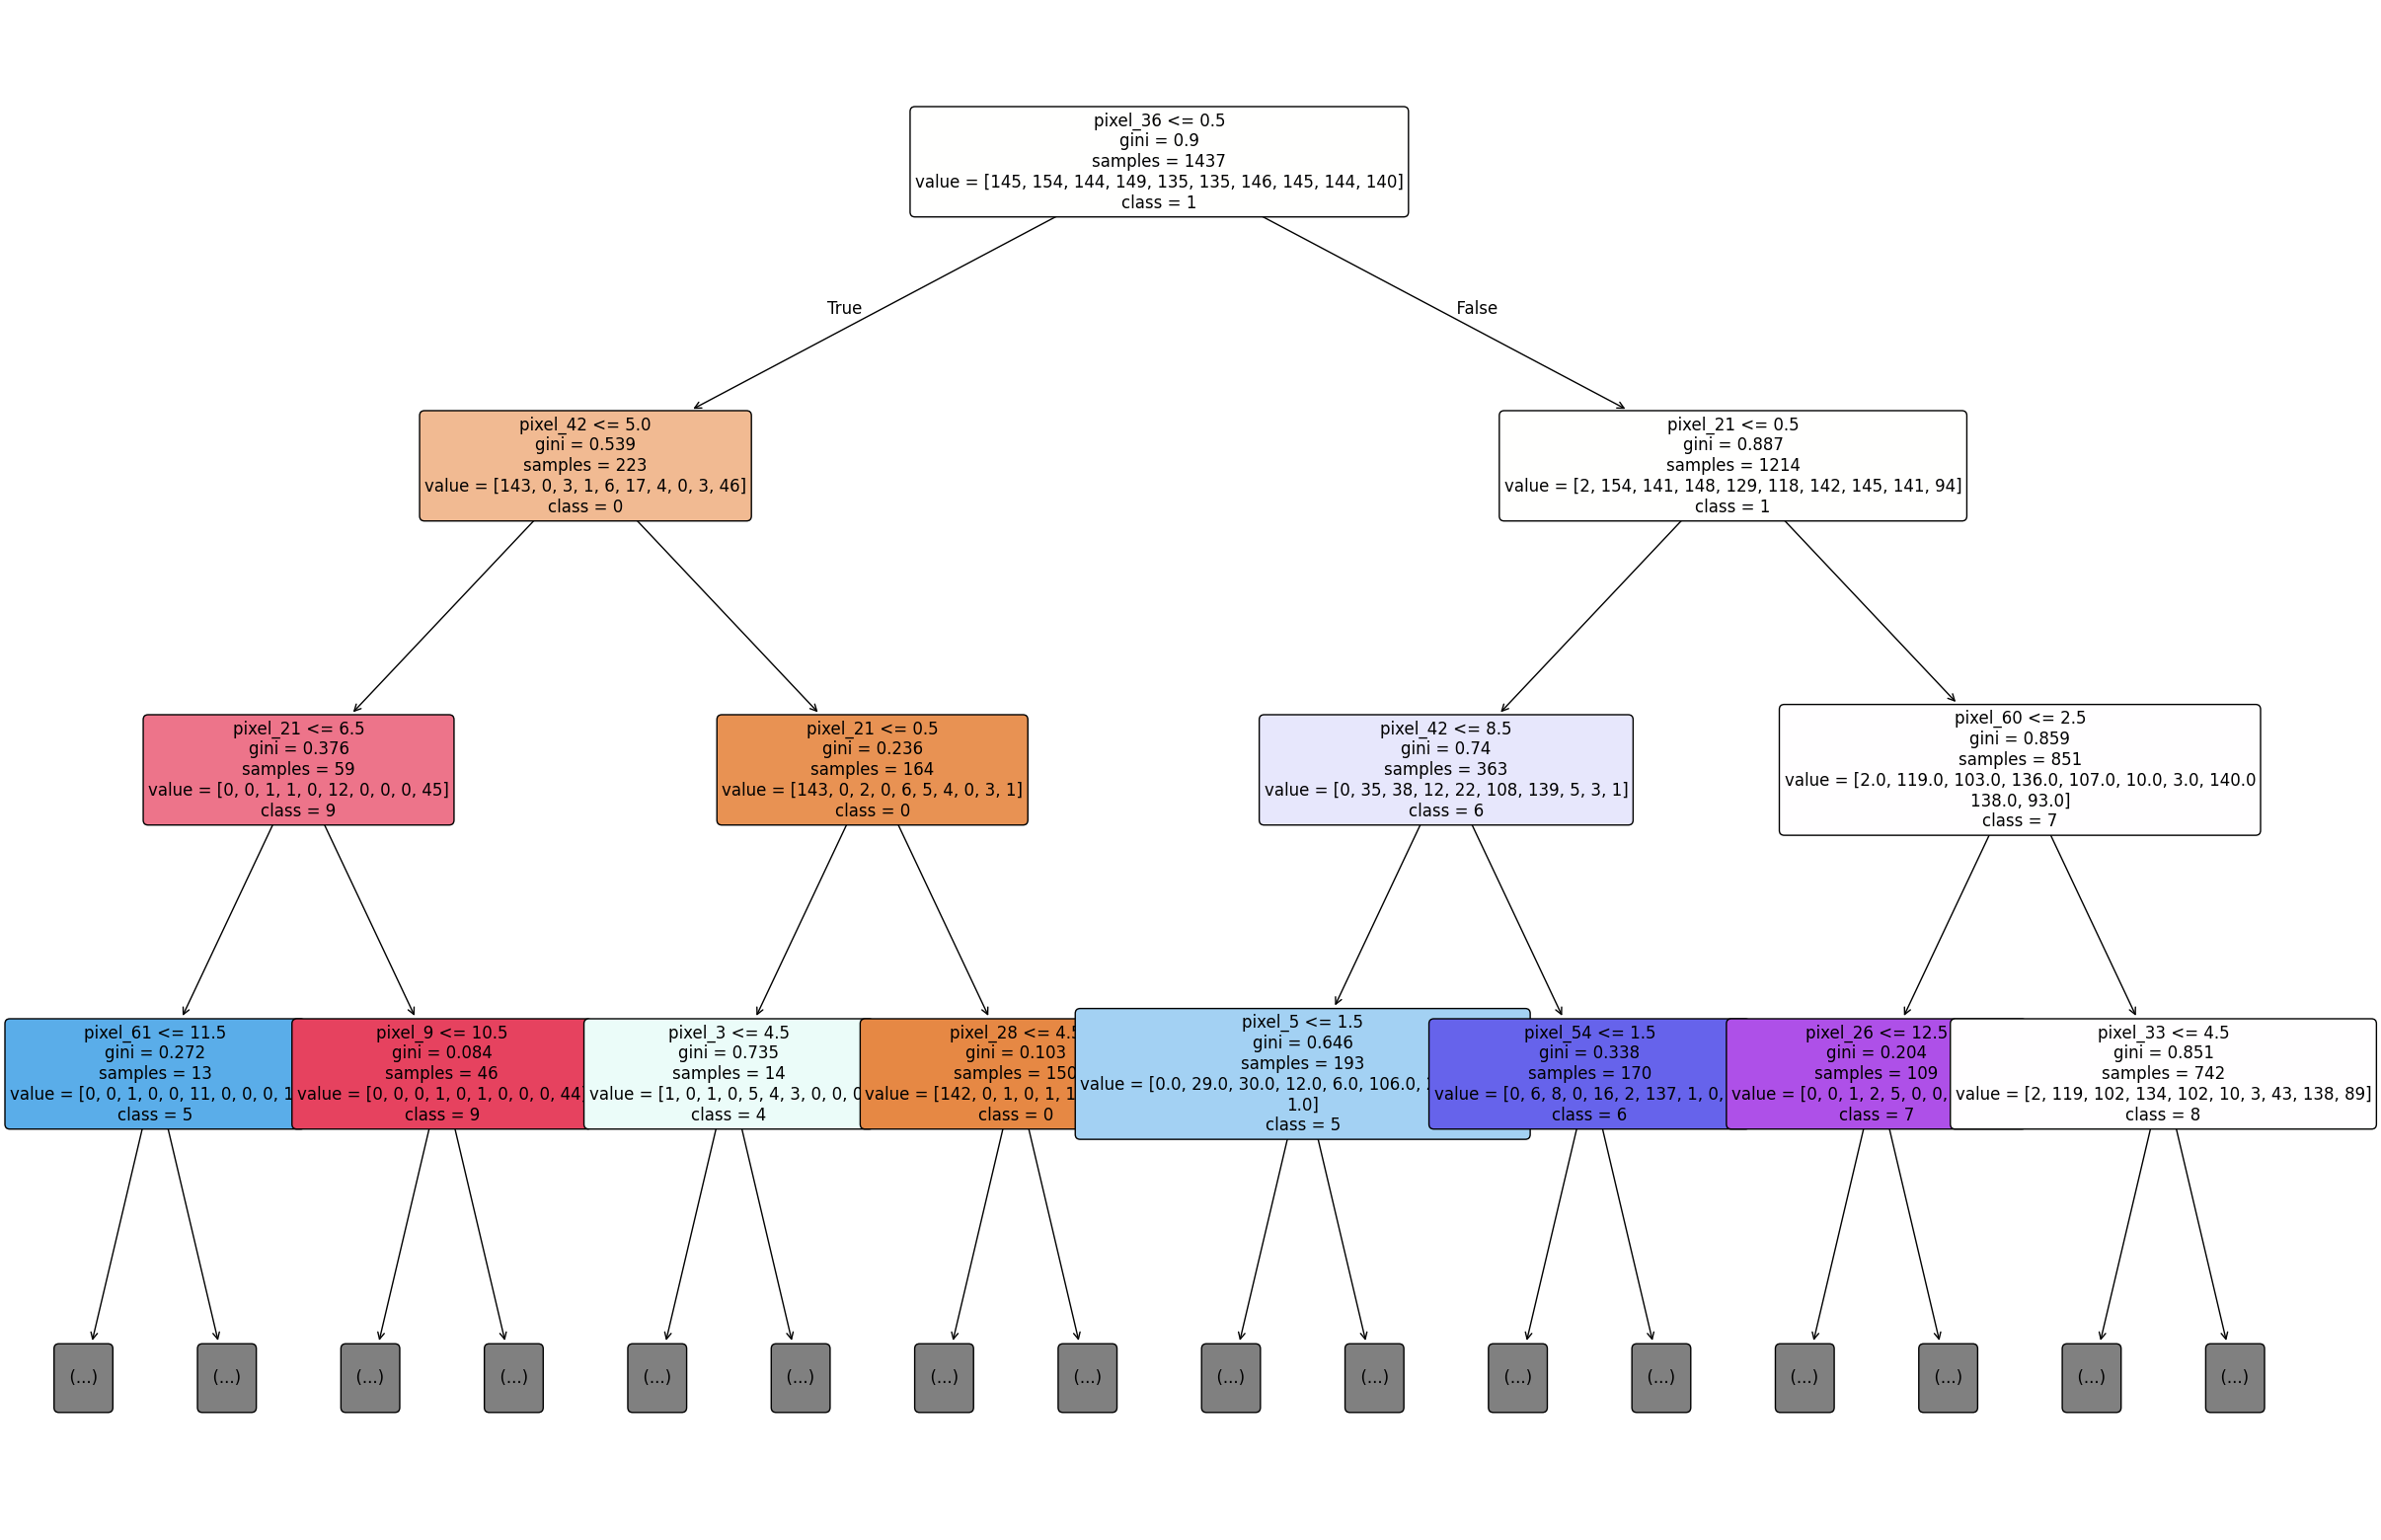

In [17]:
from sklearn import tree
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Carregar o dataset de dígitos
digits = load_digits()
X, y = digits.data, digits.target

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir e treinar o modelo de árvore de decisão
single_tree = tree.DecisionTreeClassifier(random_state=42)
single_tree.fit(X_train, y_train)

# Visualizar a árvore de decisão com maior profundidade e maior figura
plt.figure(figsize=(30, 20))  # Aumenta o tamanho da figura para melhorar a legibilidade
tree.plot_tree(single_tree, 
               filled=True, 
               feature_names=[f'pixel_{i}' for i in range(64)], 
               class_names=[str(i) for i in range(10)], 
               rounded=True, 
               fontsize=12,  # Aumenta o tamanho da fonte para melhorar a leitura
               max_depth=3)  # Limita a profundidade para 3 níveis para facilitar a visualização
plt.show()
